# Delivery 4 - Part 4

Now that we have the data we want - it's time to answer some questions.
1. Does the percentage of influenza type A and B follow the same overall trend that 75% of confirmed cases are influenza A [1](https://www.healthline.com/health/cold-flu/influenza-a-vs-b#prevalence)?
    * Due to time constraints - I will be analyzing the 2017-2018 influenza season. However, if more time permits - I would like to look into this for all seasons.

2. Are there any noteable correlations between features in our 2017-2018 season dataset?

3. If a county has a higher prevalence rate of type A influenza, will it have a higher overall prevalence rate? I hypothesize that this will be the case for the 2017-2018 influenza season.

References:
1. J. Seladi-Schulman, PhD. **How Are Influenza A and B Different?** 2019. Healthline. Retrieved from URL: https://www.healthline.com/health/cold-flu/influenza-a-vs-b#prevalence on April 20, 2020.

First, we will import the basic packages and read in our previously saved dataset - `data_17` (see previous parts of this delivery to learn how I made this dataset). 

In [1]:
import pandas as pd
import numpy as np

path = "../Datasets/"
cols = ["County","Count","Influenza A","Influenza B","Influenza Unspecified",
       "FIPS","Prevalence Rate","Female Population","Male Population","Total Population"]
data = pd.read_csv(path+"data_17.csv", usecols = cols)
data.head()

,County,Count,Influenza A,Influenza B,Influenza Unspecified,FIPS,Prevalence Rate,Female Population,Male Population,Total Population
0,ALBANY,1708,1234,456,18,36001.0,56.074275,159866,149746,309612
1,ALLEGANY,205,141,58,6,36003.0,42.008197,23042,23852,46894
2,BRONX,11749,6784,4740,225,36005.0,84.081484,777359,693801,1471160
3,BROOME,2214,1618,584,12,36007.0,111.053706,98358,95281,193639
4,CATTARAUGUS,492,235,255,2,36009.0,61.642548,38897,38451,77348


Before moving forward - I decided to take a look at the overall prevalence rate's distribution. This is because I would like to compare it to the distribution of the rates of Influenza A and B. 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

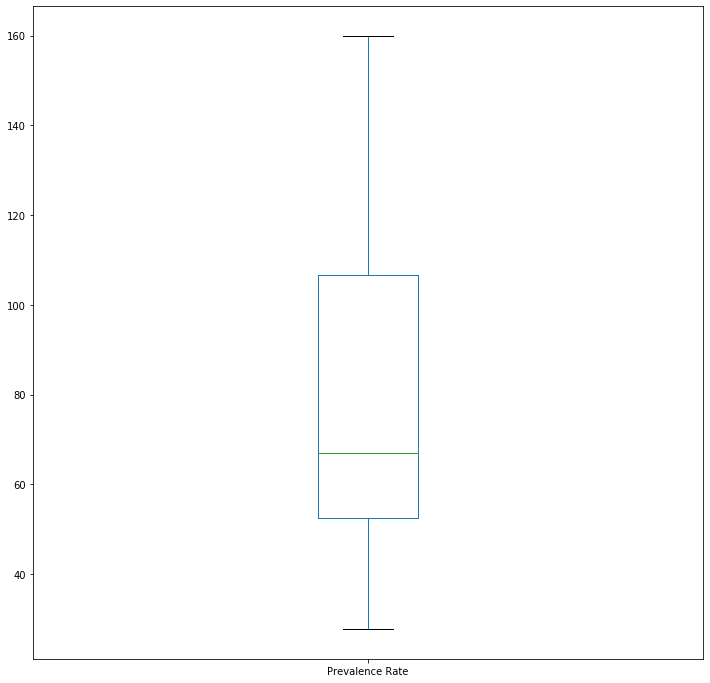

In [3]:
data.boxplot(by=None, column=['Prevalence Rate'], figsize=(12,12), grid=False)

## Statistical Analysis
I'm sticking with pretty basic statistical methods in this project. I would like to delve into more statistical learning in the future.

**Influenza A, B and Unspecified**
First we will look at their means, standard deviation, and variance. The **standard deviation** is the square root of the variance. **Standard deviation** looks at how spread out a group is from the mean, while variance measures the average degree to which each point differs from the mean [[2](https://www.investopedia.com/ask/answers/021215/what-difference-between-standard-deviation-and-variance.asp)].The variance is expressed in squared units and will be used to calculate the **effect size**.

References:
2. Investopedia. **Standard Deviation vs. Variance: What's the Difference?**. 2020. Financial Analysis. Retrieved from URL: https://www.investopedia.com/ask/answers/021215/what-difference-between-standard-deviation-and-variance.asp on March 25, 2020.
 

In [4]:
print("Mean Count of Influenza A Cases:", data['Influenza A'].mean())
print("Mean Count of Influenza B Cases:", data['Influenza B'].mean())
print("Mean Count of Influenza Unspecified Cases:", data['Influenza Unspecified'].mean())

print("Standard Deviation (std) of Influenza A Cases:", data['Influenza A'].std())
print("Std of Influenza B Cases:", data['Influenza B'].std())
print("Std of Influenza Unspecified Cases:", data['Influenza Unspecified'].std())

print("Variance of Influenza A Cases:", data['Influenza A'].var())
print("Variance of Influenza B Cases:", data['Influenza B'].var())
print("Variance of Influenza Unspecified Cases:", data['Influenza Unspecified'].var())

Mean Count of Influenza A Cases: 1242.4354838709678
Mean Count of Influenza B Cases: 809.9193548387096
Mean Count of Influenza Unspecified Cases: 16.14516129032258
Standard Deviation (std) of Influenza A Cases: 1748.6876261363036
Std of Influenza B Cases: 1332.785389711744
Std of Influenza Unspecified Cases: 45.05437398907378
Variance of Influenza A Cases: 3057908.413802221
Variance of Influenza B Cases: 1776316.8950290857
Variance of Influenza Unspecified Cases: 2029.896615547328


The variance is quite high, but we need to consider counties vary by population, so this makes a big difference. We will need to normalize this data by calculating their prevalence rates instead. We will use the same prevalence calculator as the one made in Delivery 3 - with some minor modifications. We will be making the row referalls to `Influenza A` and `Influenza B`, rather than `Count`. These columns contain the number of confirmed Influenza A and B cases.

**Calculating Influenza A prevalence rate and adding it as a new column in our dataset:**

In [5]:
def CalcPrevalenceNumerator(df):
    numerator=[]
    
    for index, row in df.iterrows():
        numerator.append(row['Influenza A']*10000)
        
    return numerator

def CalcPrevalenceRate(df):
    rate=[]
    
    for index, row in df.iterrows():
        rate.append(row.x/row['Total Population'])
        
    return rate

In [6]:
# Save calculation/values/list as variable x
x = CalcPrevalenceNumerator(data["Influenza A"].to_frame())

# Add the values as a column with the respective counties
data['x'] = x

# See what this looks like
data.head(2)

,County,Count,Influenza A,Influenza B,Influenza Unspecified,FIPS,Prevalence Rate,Female Population,Male Population,Total Population,x
0,ALBANY,1708,1234,456,18,36001.0,56.074275,159866,149746,309612,12340000
1,ALLEGANY,205,141,58,6,36003.0,42.008197,23042,23852,46894,1410000


In [7]:
# Save calculated values as 'rate'
rate = CalcPrevalenceRate(data)

# Add new column containing these values
data['A Rate'] = rate

# Drop column 'x'
data = data.drop(['x'], axis=1)

# See the new dataframe containing our new column!
data.head()

,County,Count,Influenza A,Influenza B,Influenza Unspecified,FIPS,Prevalence Rate,Female Population,Male Population,Total Population,A Rate
0,ALBANY,1708,1234,456,18,36001.0,56.074275,159866,149746,309612,39.856336
1,ALLEGANY,205,141,58,6,36003.0,42.008197,23042,23852,46894,30.067813
2,BRONX,11749,6784,4740,225,36005.0,84.081484,777359,693801,1471160,46.113271
3,BROOME,2214,1618,584,12,36007.0,111.053706,98358,95281,193639,83.557548
4,CATTARAUGUS,492,235,255,2,36009.0,61.642548,38897,38451,77348,30.382169


Now we have the prevalence rate of Influenza A cases as `A Rate`.

**Calculating the prevalence rate of Influenza B and adding it as a new column `B Rate`:**

In [8]:
def CalcPrevalenceNumerator(df):
    numerator=[]
    
    for index, row in df.iterrows():
        numerator.append(row['Influenza B']*10000)
        
    return numerator

In [9]:
# Save calculation/values/list as variable x
x = CalcPrevalenceNumerator(data["Influenza B"].to_frame())

# Add the values as a column with the respective counties
data['x'] = x

# See what this looks like
#data.head(2)

# Save calculated values as 'rate'
rate = CalcPrevalenceRate(data)

# Add new column containing these values
data['B Rate'] = rate

# Drop column 'x'
data = data.drop(['x'], axis=1)

# See the new dataframe containing our new column!
data.head()

,County,Count,Influenza A,Influenza B,Influenza Unspecified,FIPS,Prevalence Rate,Female Population,Male Population,Total Population,A Rate,B Rate
0,ALBANY,1708,1234,456,18,36001.0,56.074275,159866,149746,309612,39.856336,14.728111
1,ALLEGANY,205,141,58,6,36003.0,42.008197,23042,23852,46894,30.067813,12.368320
2,BRONX,11749,6784,4740,225,36005.0,84.081484,777359,693801,1471160,46.113271,32.219473
3,BROOME,2214,1618,584,12,36007.0,111.053706,98358,95281,193639,83.557548,30.159214
4,CATTARAUGUS,492,235,255,2,36009.0,61.642548,38897,38451,77348,30.382169,32.967885


Now we have our `B Rate`. We want to get the prevalence rate of Unspecified types of influenza as well - in case someone wants to use that data in the future.

In [10]:
def CalcPrevalenceNumerator(df):
    numerator=[]
    
    for index, row in df.iterrows():
        numerator.append(row['Influenza Unspecified']*10000)
        
    return numerator

In [11]:
# Save calculation/values/list as variable x
x = CalcPrevalenceNumerator(data["Influenza Unspecified"].to_frame())

# Add the values as a column with the respective counties
data['x'] = x

# See what this looks like
#data.head(2)

# Save calculated values as 'rate'
rate = CalcPrevalenceRate(data)

# Add new column containing these values
data['U Rate'] = rate

# Drop column 'x'
data = data.drop(['x'], axis=1)

# See the new dataframe containing our new column!
data.head()

,County,Count,Influenza A,Influenza B,Influenza Unspecified,FIPS,Prevalence Rate,Female Population,Male Population,Total Population,A Rate,B Rate,U Rate
0,ALBANY,1708,1234,456,18,36001.0,56.074275,159866,149746,309612,39.856336,14.728111,0.581373
1,ALLEGANY,205,141,58,6,36003.0,42.008197,23042,23852,46894,30.067813,12.368320,1.279481
2,BRONX,11749,6784,4740,225,36005.0,84.081484,777359,693801,1471160,46.113271,32.219473,1.529405
3,BROOME,2214,1618,584,12,36007.0,111.053706,98358,95281,193639,83.557548,30.159214,0.619710
4,CATTARAUGUS,492,235,255,2,36009.0,61.642548,38897,38451,77348,30.382169,32.967885,0.258572


Now we can analyze the mean, std, variance, and remaining summary statistics for the prevalence rates of these influenza types.

In [12]:
print("Mean Rate of Influenza A Cases:", data['A Rate'].mean())
print("Mean Rate of Influenza B Cases:", data['B Rate'].mean())
print("Mean Rate of Influenza Unspecified Cases:", data['U Rate'].mean())
print(" ")
print("Std of the Prevalence Rate of Influenza A Cases:", data['A Rate'].std())
print("Std of the Prevalence Rate of Influenza B Cases:", data['B Rate'].std())
print("Std of the Prevalence Rate of Influenza Unspecified Cases:", data['U Rate'].std())
print(" ")
print("Variance of Influenza A Case Prevalence Rates:", data['A Rate'].var())
print("Variance of Influenza B Case Prevalence Rates:", data['B Rate'].var())
print("Variance of Influenza Unspecified Case Prevalence Rates:", data['U Rate'].var())
print("***************************************************************************")
print("Summary Stats of Influenza A Prevalence Rates:", data['A Rate'].describe())
print(" ")
print("Summary Stats of Influenza B Prevalence Rates:", data['B Rate'].describe())
print(" ")
print("Summary Stats of Influenza U Prevalence Rates:", data['U Rate'].describe())

Mean Rate of Influenza A Cases: 52.284390843895395
Mean Rate of Influenza B Cases: 27.09470722976843
Mean Rate of Influenza Unspecified Cases: 0.33131383043454754
 
Std of the Prevalence Rate of Influenza A Cases: 25.68678539476297
Std of the Prevalence Rate of Influenza B Cases: 13.457847105063225
Std of the Prevalence Rate of Influenza Unspecified Cases: 0.35208252323551503
 
Variance of Influenza A Case Prevalence Rates: 659.8109439166084
Variance of Influenza B Case Prevalence Rates: 181.1136487032586
Variance of Influenza Unspecified Case Prevalence Rates: 0.12396210316788697
***************************************************************************
Summary Stats of Influenza A Prevalence Rates: count     62.000000
mean      52.284391
std       25.686785
min        3.677503
25%       32.930644
50%       46.468007
75%       66.602788
max      124.669306
Name: A Rate, dtype: float64
 
Summary Stats of Influenza B Prevalence Rates: count    62.000000
mean     27.094707
std      13.4

**Observations:**

**Influenza A**
* **Mean:** On average (across all counties), the prevalence rate (per 10,000 people) is about 52. This means that on average, 52 people out of 10,000 people in NYS had a **confirmed case of _Influenza A_** in the 2017-2018 flu season.
* **Standard Deviation (std):** The standard deviation is approximately 26 (if we round up). This means that the prevalence rate across all counties may be 52+/-26. **Most** prevalence rates should fall within the range of 26 and 78 influenza cases per 10,000 people (_assuming a normal distribution_).
    * However, we do have the quartiles (25%, 50%, and 75%) at 33, 46, and 66 respectively.
* The minimum prevalence rate of influenza A is about 4 (per 10,000), with the maximum being at 125 (per 10,000). 
* **Variance**: The variance is still quite **high (~660)**. What does this mean though? Variance is the average of the _squared_ distances from each point to the mean. Variance does **NOT have the same unit of measure** as our data (prevalence rate). So this is mostly just telling us that our data points are very spread out from the mean and from eachother. We will do some visualizations to see what this looks like. 


We will use Seaborn to do the box plot (takes up less space than matplotlib - and is automatically horizontal which makes it easier to visualize the distribution). Code is based off [Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

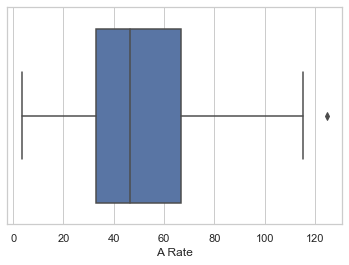

In [13]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["A Rate"])

Now let's look at the distribution as well as fit a kernel density estimate (KDE). In summary, kernel density estimation is a non-parametric way to smooth the data (based on estimation of probability density function) to make inferences about a population with a finite data sample. In this case - it's just helping us see the "shape" of our data [[3](https://mathisonian.github.io/kde/)]!

3. Matthew Conlen. **Kernel Density Estimation**. Github.io. Retrieved from URL: https://mathisonian.github.io/kde/ on April 29, 2020.

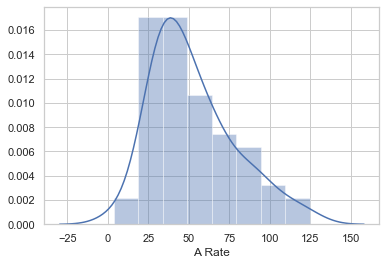

In [14]:
# Based on sns tutorial https://seaborn.pydata.org/tutorial/distributions.html
x = data['A Rate']
sns.distplot(x);

As shown by both the box plot and the histogram, or data is slightly right skewed. This simply means most of the data falls to the right of the graph's peak. This is expected because this data is recorded during the influenza season, so there should be more cases, most of which (and all of which for this season in particular) are greater than 0 cases (which means prevalence rate>0). From here on I will assume you understand that **Prevalence Rate (referred to as Rate) is the number of confirmed influenza cases (A, B or Unspecified) per 10,000 people.** 

Based on the **box plot** we have one potential **outlier** with a **Rate= ~125**. This data is not incorrect, but it does affect the mean! **What county has this prevalence rate?**

In [15]:
data.loc[(data["A Rate"]>124)]

,County,Count,Influenza A,Influenza B,Influenza Unspecified,FIPS,Prevalence Rate,Female Population,Male Population,Total Population,A Rate,B Rate,U Rate
32,ONEIDA,3745,2884,833,28,36065.0,159.893774,116073,115259,231332,124.669306,36.008853,1.210382


The county with this high prevalence rate of influenza type A is **Oneida** county - which was one of the counties we discussed/noticed in previous deliveries as one of the counties with the highest prevalence rates in general. In the future - I would be interested in learning more about this county and looking at more factors that may be contributing to this high rate of influenza.

**Influenza B:**

Let's pull up the summary statistics for B (so we don't have to scroll up) again and discuss what it means.

In [16]:
print("Variance of Influenza B Case Prevalence Rates:", data['B Rate'].var())
print("***************************************************************************")
print("Summary Stats of Influenza B Prevalence Rates:", data['B Rate'].describe())

Variance of Influenza B Case Prevalence Rates: 181.1136487032586
***************************************************************************
Summary Stats of Influenza B Prevalence Rates: count    62.000000
mean     27.094707
std      13.457847
min       3.283195
25%      15.827036
50%      25.643754
75%      33.686965
max      57.343893
Name: B Rate, dtype: float64


* **Mean:** On average (across all counties), the prevalence rate of influenza B is 27. **Meaning that on average, 27 out of 10,000 have confirmed influenza B**.
    * Recall that mean(A Rate) = 52. The **difference between the means** of influenza A and B rates is **25**, with $A_{Rate} > B_{Rate}$.
* **Std:** The standard deviation from the mean is +/- 13 (approximately). This is a little bit lower than the std of influenza A's rate. 
* **Variance:** The variance is also lower (**181**) meaning we expect the spread of the data will be less. We will see if this is the case in following visualizations.
* **Other summary statistics:**
    * The minimum rate is about 3 (similar to influenza A), with the max lower than A at **57**. This might actually be close enough to the mean/the standard deviation to where it won't be a potential outlier! Let's see!

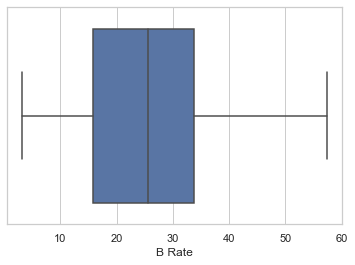

In [17]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["B Rate"])

Sure enough - we see no potential outliers. 

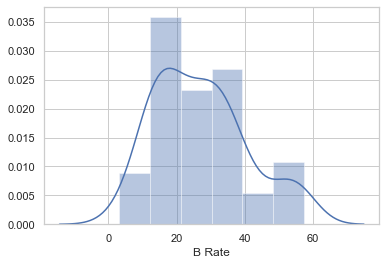

In [18]:
x = data['B Rate']
sns.distplot(x);

Unlike the box plot - the distribution is not normal. It is not terrible, but not great. This is actually looks bi-modal in that there are two frequent values that are not as close to eachother. 
**Possible Reasons**
* Not enough data discrimination, or in other words - not enough different values (due to grouping the data by county - meaning we have less data points and a higher level of aggregation). 
* We don't have a ton of data points because n = 62! What I would like to do (if I have time) is to actually put all of the seasonal subsets **together** and redo this process to see the distribution as a whole. 

This article is helpful for troubleshooting a distribution you expected to be normal but wasn't: https://www.isixsigma.com/tools-templates/normality/dealing-non-normal-data-strategies-and-tools/

**Unspecified Influenza Type**

I am not expecting this data to be normally distributed - because there's not a lot of these cases. We should still look into it though.

In [19]:
print("Variance of Influenza Unspecified Case Prevalence Rates:", data['U Rate'].var())
print("***************************************************************************")
print("Summary Stats of Influenza U Prevalence Rates:", data['U Rate'].describe())

Variance of Influenza Unspecified Case Prevalence Rates: 0.12396210316788697
***************************************************************************
Summary Stats of Influenza U Prevalence Rates: count    62.000000
mean      0.331314
std       0.352083
min       0.000000
25%       0.096150
50%       0.221662
75%       0.479064
max       1.529405
Name: U Rate, dtype: float64


Small mean, std, variance, and max. 

#### Calculating Effect Size
**Effect size** describes the size of an effect [[5](https://www.kaggle.com/kanncaa1/statistical-learning-tutorial-for-beginners)]. This helps us quantify the difference between two groups - such as influenza A and B prevalence rates.

5. DATA! **Statistical Learning Tutorial for Beginners**. 2018. Retrieved from URL: https://www.kaggle.com/kanncaa1/statistical-learning-tutorial-for-beginners on April 29, 2020. 

In [20]:
A_mean = data['A Rate'].mean()
B_mean = data['B Rate'].mean()

A_var = data['A Rate'].var()
B_var = data['B Rate'].var()

In [21]:
mean_diff = A_mean - B_mean
var_pooled = (len('A Rate')*A_var +len('B Rate')*B_var)/float(len('A Rate')
                                                             +len('B Rate'))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect Size:", effect_size)

Effect Size: 1.2284548062879377


This large effect size indicates that the two groups (Influenza A and Influenza B prevalence rates) are different from eachother. This supports the idea that for the 2017-2018 Season, Influenza A had a significantly higher prevalence rate (on average) than Influenza B. 

#### Percentage of Type A vs Type B Influenza Prevalence Rates
Another question I asked in my previous writeup was: **Does the percentage of Type A and Type B influenza cases (and rates) reflect the typical ratio of 75% of influenza cases are Type A and 25% are Type B [[6](https://www.healthline.com/health/cold-flu/influenza-a-vs-b#contagiousness)]?**

Let's investigate this question for the 2017-2018 season.

First we will look at the percentages of all three types (A, B, and Unspecified), then we will just look at A and B. We will use the Case Counts rather than Prevalence Rate since we are looking at a ratio (so the normalization does not matter in this case).

6. Jill Seladi-Schulman, PhD. **How Are Influenza A and B Different?** 2019. Healthline. Retrieved from URL:https://www.healthline.com/health/cold-flu/influenza-a-vs-b#contagiousness on April 20, 2020.

In [22]:
# We will look at the percentages of all three w/r to eachother first
A_mean_count = data['Influenza A'].mean()
B_mean_count = data['Influenza B'].mean()
U_mean_count = data['Influenza Unspecified'].mean()

# Will calculate overall mean percentage - but it may be helpful to calculate
# percentages for each county to see the distribution/variance.

mean_percentage_A = (A_mean_count/(A_mean_count+B_mean_count+
                                  U_mean_count))*100
mean_percentage_B = (B_mean_count/(A_mean_count+B_mean_count+
                                  U_mean_count))*100
mean_percentage_U = (U_mean_count/(A_mean_count+B_mean_count+
                                  U_mean_count))*100
print('Average Percentage of Influenza A Cases:',mean_percentage_A)

print('Average Percentage of Influenza B Cases:',mean_percentage_B)

print('Average Percentage of Influenza U Cases:',mean_percentage_U)

Average Percentage of Influenza A Cases: 60.064562913752376
Average Percentage of Influenza B Cases: 39.15491200573892
Average Percentage of Influenza U Cases: 0.7805250805087058


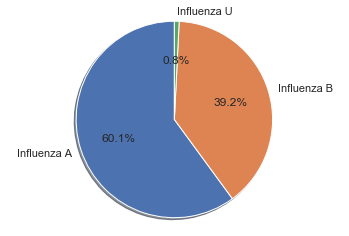

In [23]:
# Visualize
# Based off code for making pie chart from
# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
labels = 'Influenza A','Influenza B','Influenza U'
sizes = [mean_percentage_A, mean_percentage_B, mean_percentage_U]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Now to look at the percentage of just A and B! This is not actually necessary, but I would like to use my percentage function that I came up with previously. It just shows you how if you define your own function and actually save it, you can re use it whenever, rather than doing the individual calculations each time (as shown above). It also helps if you want to look at the percentages of individual counties.

In [24]:
def calc_percentage_A(df):
    percentage_A=[]
    
    for index, row in df.iterrows():
        try:
            percentage_A.append((row['Influenza A']/(row['Influenza A']+
                                                 row['Influenza B']))*100)
        except ZeroDivisionError:
            percentage_A.append(0)
    return percentage_A
            
def calc_percentage_B(df):
    percentage_B=[]
    
    for index, row in df.iterrows():
        try:
            percentage_B.append((row['Influenza B']/(row['Influenza A']+
                                row['Influenza B']))*100)
        except ZeroDivisionError:
            percentage_B.append(0)
    return percentage_B   

C:\Users\kathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app


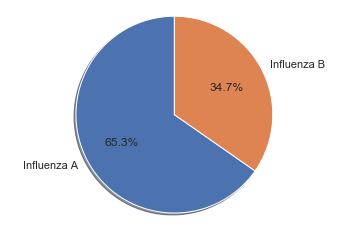

In [25]:
percent_A = calc_percentage_A(data)
#percent_A
percent_A = pd.DataFrame(percent_A)
#percent_A.describe()
percent_B = calc_percentage_B(data)
#percent_B
percent_B = pd.DataFrame(percent_B)
#percent_B.describe()

labels = 'Influenza A','Influenza B'
sizes = [percent_A.mean(), percent_B.mean()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Observations**

For the 2017-2018 season - out of all confirmed cases of influenza A and B in NYS, 65.3% of cases were influenza A and 34.7% influenza B. For this year, I can support my original hypothesis that there would be more confirmed Influenza A cases and B cases. The proportion of A to B is also similar (according to data and visualizations alone) to the 75% to 25%, but that's really all I can say about that. 

### Correlations
I have added some data and extracted features (such as the A and B counts and the prevalence rates)- let's see if we can find any potential correlations for the 2017-2018 influenza season. The code for the heat map is based off [source 5](https://www.kaggle.com/kanncaa1/statistical-learning-tutorial-for-beginners) [5].

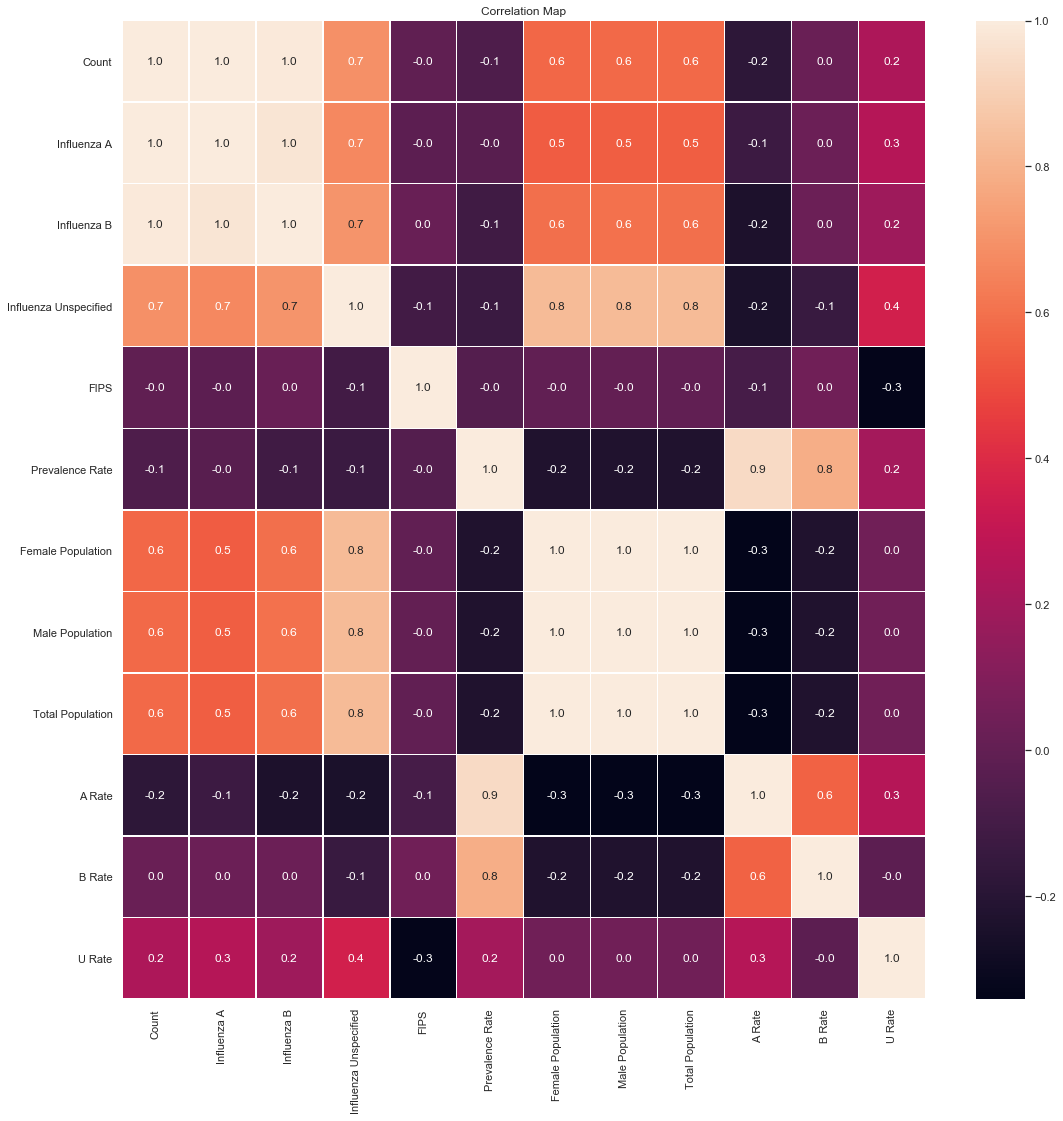

In [26]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
#plt.savefig('graph.png')
plt.show()

**Observations**

**Brief Review of Correlation Matrices**
So we have a big matrix with lots of numbers ranging from -1 to 1. 
* 1 means two variables are positively **correlated** with eachother
* -1 means two variables are negatively correlated with eachother (a value decreases as the other increases).
* 0 means no correlation between variables
* anything in between?
    * If $x = correlation$ and $1>x>0$, then there is **some** positive correlation. The closer to 1, the stronger the positive correlation.
    * If $0>x>-1$, then there is **some** negative correlation. The closer to -1, the stronger the negative correlation.

I'm not going to cover all of these, but I will cover ones that stick out to me! **Note that** the correlation across the diagonal = 1 because a feature should have a 100% correlation with itself (example: if the count of confirmed cases increase, the count of confirmed cases increase). 

A lot of these make sense - but there's something I found interesting.
* **Population vs. Prevalence Rate**
    * Corr = -0.2 meaning it's not necessarily a strong correlation, but as population increases, prevalence rate decreases.
    * This makes sense... the population increases meaning the denominator in our prevalence rate function increases, resulting in a smaller number, **BUT** this only makes sense if the number of cases isn't affected by population. I originally expected that highly populated areas would have a higher prevalencee rate because people are expected to be in closer proximity to one another. This (as well as previous visualizations) shows that population (at least for a given county) does not affect the number of confirmed cases (which means that **maybe** (can't confirm with this data) the virus spread is not affected by population of a county alone. To be clear - county population and case rates may not be as accurate because there are places in counties and **between** county borders that have a higher population density. That is why it would be interesting to find and implement data that actually has population data in each neighborhood in a county. 
    
Another example as to why we cannot rely heavily on these correlations (which is why you need other statistical methods past this) is the fact that FIPS has a correlation of -0.3 with U Rate... meaning that as the FIPS code decreases in number (recall - this is a categorical feature representing a county) the prevalence rate of unspecified cases increase (and vice versa).
    

* **Influenza A Prevalence Rate vs. Female Population/Male Pop/Total Pop**
    * I got excited at first... seeing a negative correlation with A Rate and Female population. However, the correlation is the same for male and total population as well... meaning it's basically the prevalence rate of influenza A and population. 
What about Influenza B?

* **Influenza B Prevalence Rate vs. Female/Male/Total Population**
    * The correlation is different (-0.2) meaning the B rate is not as strongly correlated (negative) to population. Still not much to write home about, however. 

In [29]:
def plot_stacked_bar_x(df, label, A, B, season):
    index = np.arange(len(label))
    plt.figure(figsize=(20,10))
    plt.bar(index, A, color='#557f2d')
    plt.bar(index, B, color = '#2d7f5e')
    plt.xlabel('County',fontsize=15)
    plt.ylabel('Influenza Type A and B Prevalence Rates', fontsize=15)
    plt.xticks(index, label, fontsize=11, rotation=70)
    plt.title('Influenza Type A and B Prevalence Rates for Each County:'+' '+season+' '+'Season', fontsize=20)
    plt.show()

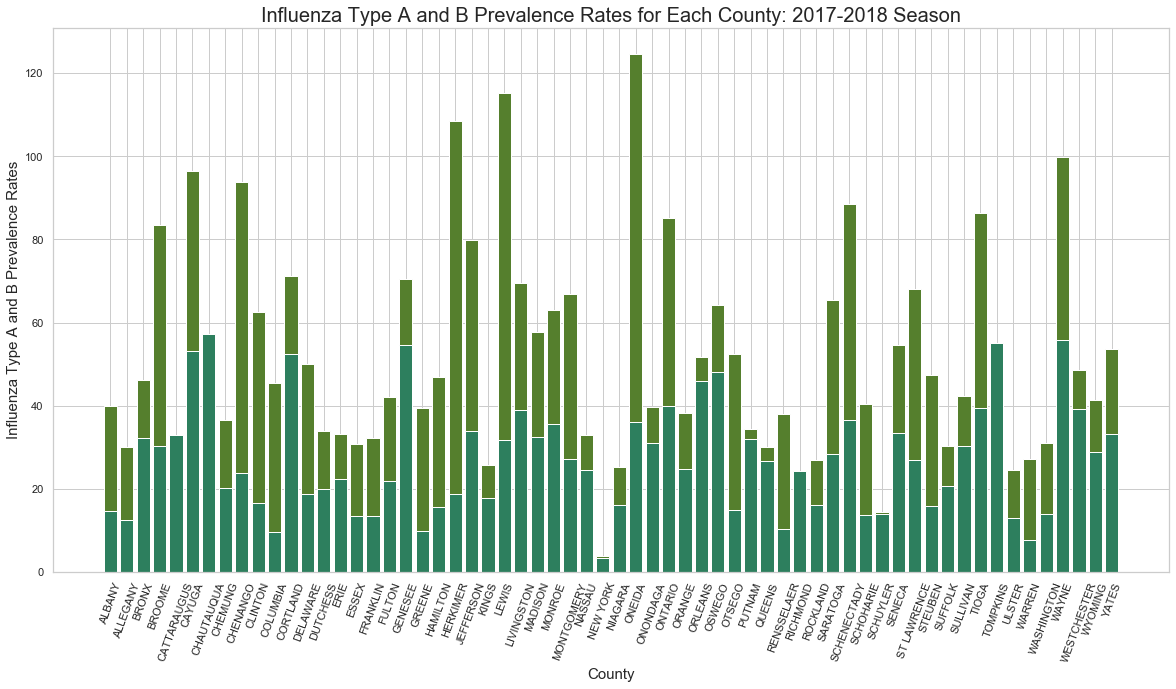

In [30]:
label = data['County']
A = data['A Rate']
B = data['B Rate']
season = "2017-2018"

plot_stacked_bar_x(data, label, A, B, season)

Seen here, our prevalence rates for A are green, and B are blue. It appears that counties with higher prevalence rates in general, have a higher prevalence rate of A than B... supporting my hypothesis!

In [32]:
#data.to_csv(path+"final_data_17.csv")